# Assignment 3

## Problem 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable

In [2]:
X1 = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
X2 = 1-X1

In [3]:
water = np.array([8.07131, 1730.63, 233.426])
dioxane = np.array([7.43155, 1554.679, 240.337])
T = 20
p_water = 10**(water[0]-water[1]/(T+water[2]))
p_dioxane = 10**(dioxane[0]-dioxane[1]/(T+dioxane[2]))
p = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])

In [4]:
p = torch.tensor(p, requires_grad = False, dtype = torch.float32)
X1 = torch.tensor(X1, requires_grad = False, dtype = torch.float32)
X2 = torch.tensor(X2, requires_grad = False, dtype = torch.float32)
A = Variable(torch.tensor([1.0,1.0]), requires_grad = True)
step = 0.0001

In [5]:
for i in range(100):
    p_hat = X1*torch.exp(A[0]*(A[1]*X2/(A[0]*X1+A[1]*X2))**2)*p_water+X2*torch.exp(A[1]*(A[0]*X1/(A[0]*X1+A[1]*X2))**2)*p_dioxane
    loss = (p-p_hat)**2
    loss = loss.sum()
    
    loss.backward()
    
    with torch.no_grad():
        A -= step*A.grad
        
        A.grad.zero_()

In [6]:
p_hat = p_hat.detach().numpy()[0]
p = p.detach().numpy()[0]
X1 = X1.detach().numpy()[0]

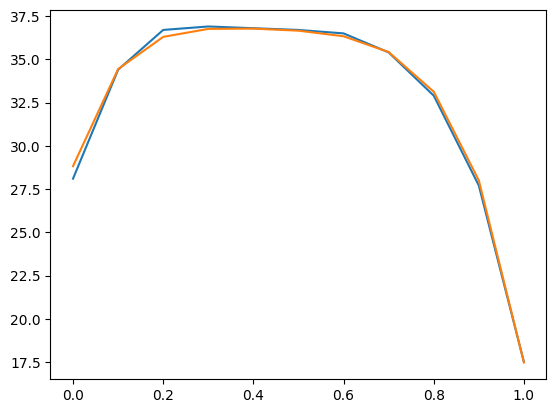

In [7]:
plt.plot(X1, p)
plt.plot(X1, p_hat)
